In [1]:
#Credit score final
library(readr)
analysis.anova <- read.csv("C:/Users/radha/Desktop/KaranExcel/Analyst Case Study AutoFinance.csv", sep=",", header = TRUE)
print(head(analysis.anova))
print(str(analysis.anova))

  id               city state postalCode country dateOfBirth monthsAtAddress
1  1         NEW ALBANY    IN      47150     USA   8/18/1982              26
2  2              BRONX    NY      10472     USA   6/20/1989               4
3  3 HUNTINGTON STATION    NY      11746     USA    8/9/1976             117
4  4           Franklin    MI      48025     USA   4/16/1979               6
5  5          BALTIMORE    MD      21214     USA    8/8/1956             114
6  6           STAUNTON    IL      62088     USA   5/27/1978              85
  residenceType housingPayment employmentType employedMonths         occupation
1    Own/Buying            100    W2 Employee            129            assbly2
2          Rent           1200    W2 Employee             29            Foreman
3    Own/Buying            600    W2 Employee            178   Staff Accountant
4          Rent           1200    W2 Employee             69           Operator
5          Rent           1300    W2 Employee             42 

In [2]:
library(eeptools)
#print(analysis.anova$dateOfBirth)
x <- as.Date(analysis.anova$dateOfBirth, , format="%m/%d/%Y")
yourdata.age <- floor(age_calc(x, units = "years"))


newdata <- cbind(analysis.anova,yourdata.age)

ndyears  <- floor(newdata$employedMonths/12)
newdata2 <- cbind(newdata,ndyears)

print(head(newdata2))

Loading required package: ggplot2


  id               city state postalCode country dateOfBirth monthsAtAddress
1  1         NEW ALBANY    IN      47150     USA   8/18/1982              26
2  2              BRONX    NY      10472     USA   6/20/1989               4
3  3 HUNTINGTON STATION    NY      11746     USA    8/9/1976             117
4  4           Franklin    MI      48025     USA   4/16/1979               6
5  5          BALTIMORE    MD      21214     USA    8/8/1956             114
6  6           STAUNTON    IL      62088     USA   5/27/1978              85
  residenceType housingPayment employmentType employedMonths         occupation
1    Own/Buying            100    W2 Employee            129            assbly2
2          Rent           1200    W2 Employee             29            Foreman
3    Own/Buying            600    W2 Employee            178   Staff Accountant
4          Rent           1200    W2 Employee             69           Operator
5          Rent           1300    W2 Employee             42 

In [3]:
library(dplyr)
newdata3 <- mutate(newdata2, cscore = ifelse(creditScore == "440-449" ,1 , 
                                  ifelse(creditScore == "450-474" ,2 ,
								  ifelse(creditScore == "450-499" ,3 ,
								  ifelse(creditScore == "475-524" ,4 ,
								  ifelse(creditScore == "500-524" ,5 ,
								  ifelse(creditScore == "525-549" ,6 ,
								  ifelse(creditScore == "525-574" ,7 ,
								  ifelse(creditScore == "550-599" ,8 ,
								  ifelse(creditScore == "575-624" ,9 ,
								  ifelse(creditScore == "600-624" ,10 ,
								  ifelse(creditScore == "625+" ,11 ,
								  ifelse(creditScore == "Less than 450" ,12,0 )
                                 
								))))))))))))



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [4]:
newdata4 <- mutate(newdata3, cscoreType2 = ifelse(creditScore == "440-449" ,445 , 
                                  ifelse(creditScore == "450-474" ,462 ,
								  ifelse(creditScore == "450-499" ,475 ,
								  ifelse(creditScore == "475-524" ,500 ,
								  ifelse(creditScore == "500-524" ,512 ,
								  ifelse(creditScore == "525-549" ,537 ,
								  ifelse(creditScore == "525-574" ,550 ,
								  ifelse(creditScore == "550-599" ,575,
								  ifelse(creditScore == "575-624" ,600 ,
								  ifelse(creditScore == "600-624" ,612 ,
								  ifelse(creditScore == "625+" ,640 ,
								  ifelse(creditScore == "Less than 450" ,430,400 )
                                 
								))))))))))))

In [5]:
newdata5 <- mutate(newdata4, mIncome = ifelse(monthlyIncome <= 1000 ,1 , 
                                              ifelse(monthlyIncome <= 2000 ,2 ,
                                  ifelse(monthlyIncome <= 3000 ,2,
								  ifelse(monthlyIncome <= 4000 ,3 ,
								  ifelse(monthlyIncome <= 5000 ,4 ,
								  ifelse(monthlyIncome <= 10000 ,5 ,
								  ifelse(monthlyIncome <= 20000 ,6 ,
								  ifelse(monthlyIncome <= 50000 ,7 ,
								  ifelse(monthlyIncome <= 90000 ,8 ,
								  ifelse(monthlyIncome > 90000 ,9 ,0
								                                 
								)))
								)))
								)))))

In [6]:
str(newdata5)

'data.frame':	193336 obs. of  21 variables:
 $ id             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ city           : Factor w/ 12451 levels "ABBEVILLE","ABBOT",..: 7638 1277 5154 3897 536 10698 8905 869 6337 536 ...
 $ state          : Factor w/ 53 levels "AB","AK","AL",..: 17 36 36 24 22 16 11 23 6 22 ...
 $ postalCode     : Factor w/ 21196 levels "10001","10002",..: 10165 80 359 10383 2706 13220 6257 8389 19204 2697 ...
 $ country        : Factor w/ 2 levels "CAN","USA": 2 2 2 2 2 2 2 2 2 2 ...
 $ dateOfBirth    : Factor w/ 19321 levels "1/1/1939","1/1/1941",..: 16594 13518 17701 10045 17632 12249 18262 12509 8366 5854 ...
 $ monthsAtAddress: int  26 4 117 6 114 85 2 12 114 27 ...
 $ residenceType  : Factor w/ 4 levels "Live with Family",..: 3 4 3 4 4 3 2 2 4 4 ...
 $ housingPayment : int  100 1200 600 1200 1300 650 300 1 150 900 ...
 $ employmentType : Factor w/ 3 levels "1099/Self Employed",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ employedMonths : int  129 29 178 69 42 208 226 5 6 131 ...
 $ oc

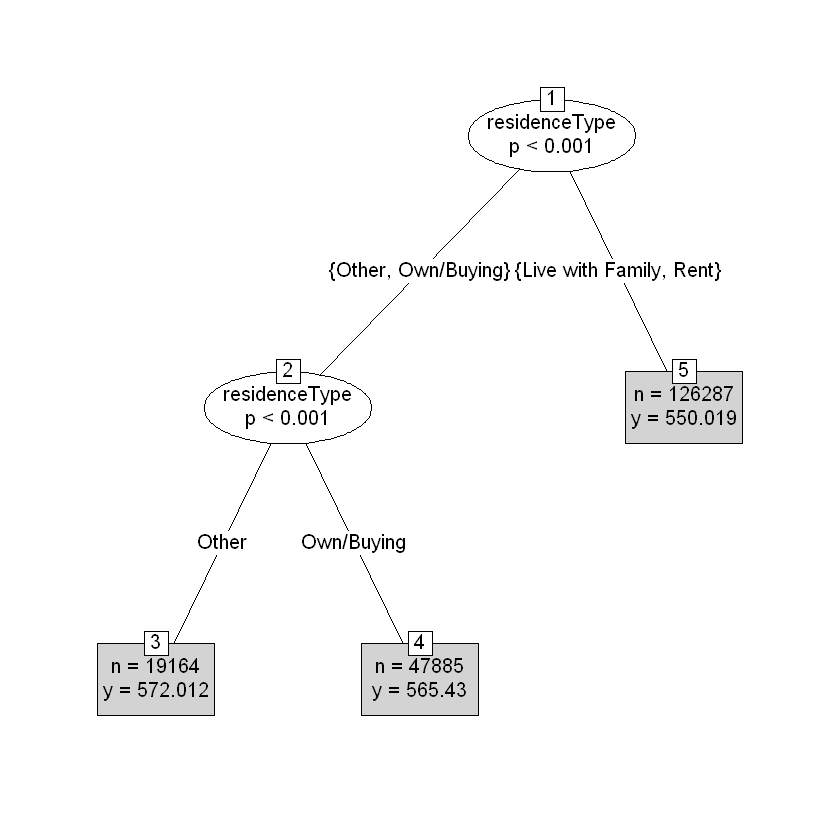

In [12]:
library(party)
# Create the tree.
  output.tree <- ctree(
  cscoreType2 ~ residenceType, 
  data = newdata5)

plot(output.tree,type="simple")

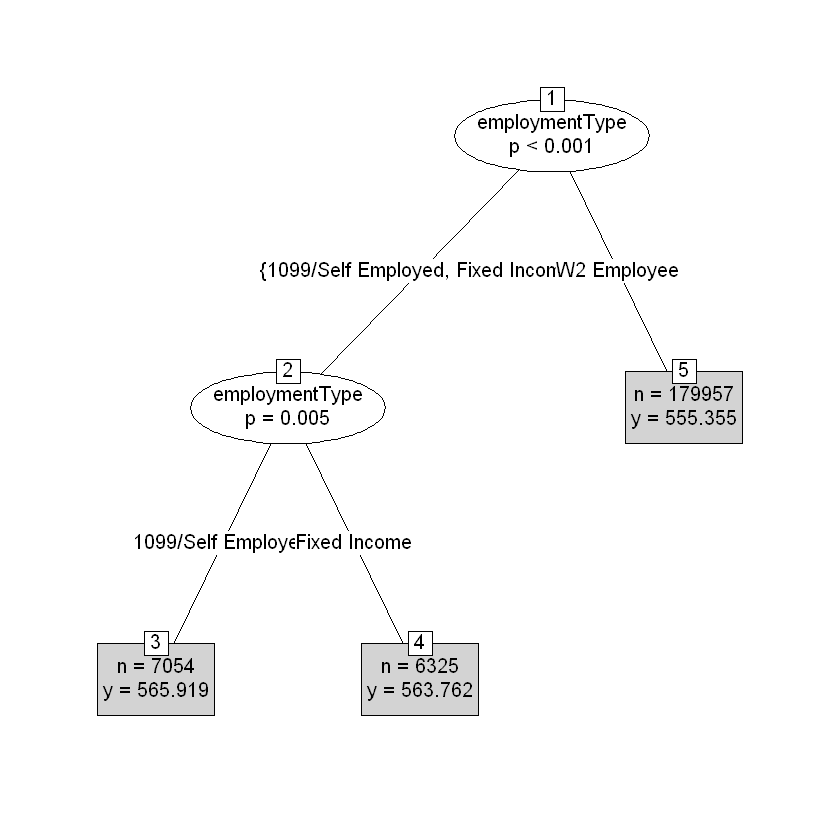

In [13]:
library(party)
# Create the tree.
  output.tree <- ctree(
  cscoreType2 ~ employmentType, 
  data = newdata5)

plot(output.tree,type="simple")

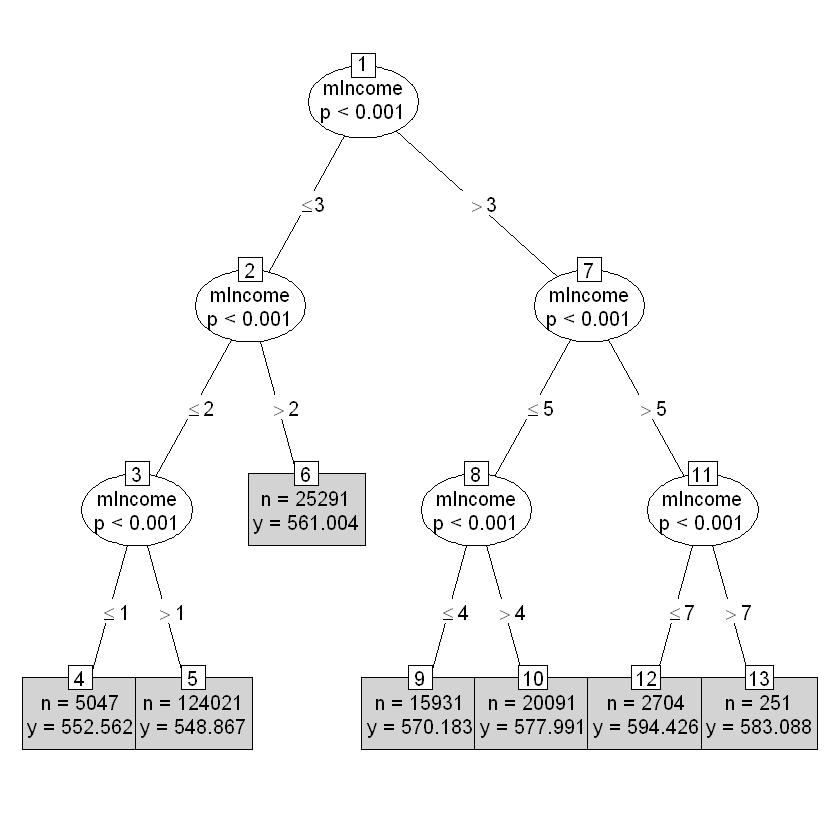

In [14]:
library(party)
# Create the tree.
  output.tree <- ctree(
  cscoreType2 ~ mIncome, 
  data = newdata5)

plot(output.tree,type="simple")

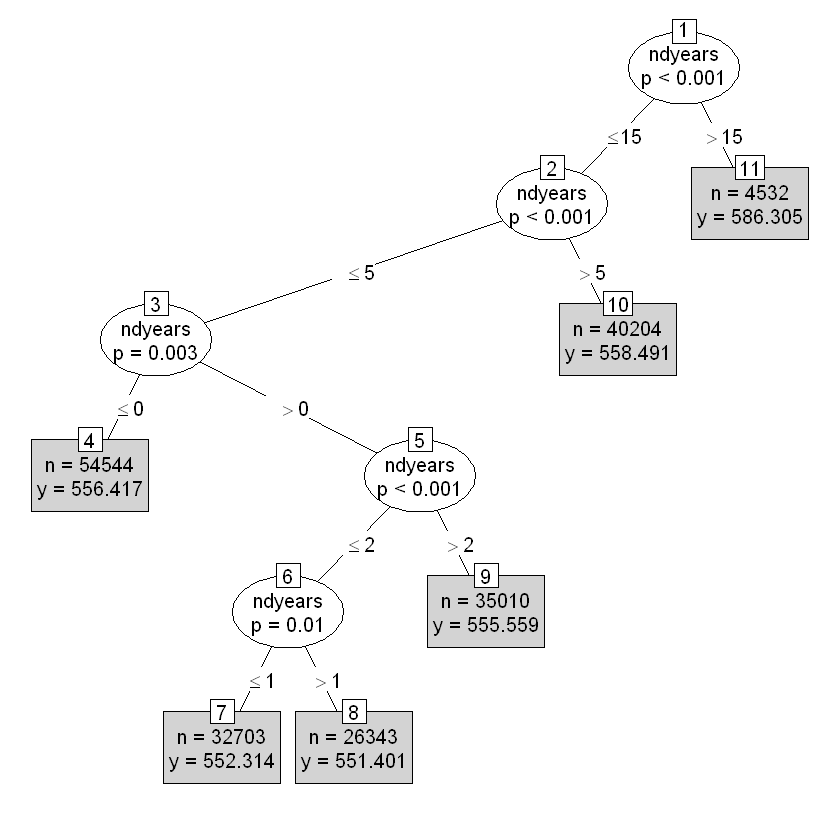

In [15]:
library(party)
# Create the tree.
  output.tree <- ctree(
  cscoreType2 ~ ndyears, 
  data = newdata5)

plot(output.tree,type="simple")

<h2> More analysis , Multiple variable </h2> <h3> cscoreType2 ~ ndyears+mIncome+employmentType+residenceType  </h3>

In [47]:
library(party)
library(partykit)
library(dplyr)
# Create the tree.
  ct <- ctree(
  cscoreType2 ~ ndyears+mIncome+employmentType+residenceType, 
  data = newdata5)

ip <- function(node) formatinfo_node(node,
  prefix = " ",
  FUN = function(info) paste0("[p = ", format.pval(info$p.value), "]")
)
print(ip)

tp <- function(node) formatinfo_node(node,
  prefix = ": ",
  FUN = function(info) paste0(
    "n = ", n[as.character(node$id)],
    ", y = (", m[as.character(node$id)], ")"
  )
)
n <- table(ct$fitted[["(fitted)"]])
m <- aggregate(ct$fitted[["(response)"]], list(ct$fitted[["(fitted)"]]), mean)
m <- apply(m[, ], 1, function(x) paste(round(x, digits = 3), collapse = ", "))
names(m) <- names(n)
           
#print(output.tree)
print.party(ct, inner_panel = ip, terminal_panel = tp)

function(node) formatinfo_node(node,
  prefix = " ",
  FUN = function(info) paste0("[p = ", format.pval(info$p.value), "]")
)
[1] root
|   [2] mIncome <= 3 [p = < 2.22e-16]
|   |   [3] residenceType in Live with Family, Rent [p = < 2.22e-16]
|   |   |   [4] mIncome <= 2 [p = < 2.22e-16]
|   |   |   |   [5] employmentType in 1099/Self Employed, Fixed Income [p = 2.1545e-05]
|   |   |   |   |   [6] residenceType in Live with Family [p = 0.012087]
|   |   |   |   |   |   [7] employmentType in 1099/Self Employed: n = 40, y = (7, 514.725)
|   |   |   |   |   |   [8] employmentType in Fixed Income: n = 36, y = (8, 549.611)
|   |   |   |   |   [9] residenceType in Rent [p = 0.00013382]
|   |   |   |   |   |   [10] mIncome <= 1: n = 197, y = (10, 565.711)
|   |   |   |   |   |   [11] mIncome > 1 [p = 0.0030097]
|   |   |   |   |   |   |   [12] employmentType in 1099/Self Employed: n = 2199, y = (12, 551.083)
|   |   |   |   |   |   |   [13] employmentType in Fixed Income: n = 2330, y = (13, 55

<h3> summary </h3>
<h4> highr score </h4>
<h4> MonthlyIncome > 3 ( 4000 USD)  , Emp experience (ndyears) over 15 Years, Resident Type- own buying  </h4>
<h4> Monthly Income > 5 (10000 USD),  Resident Type - Own Buying </h4>
<h4> Resident Type - Own, Monthly Income > 1 , Emp experience (ndyears) over 15 Years </h4>

